In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import custom_funcs as cf
from datetime import datetime

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#G = cf.load_seventh_grader_network()
#H = nx.read_gpickle('Synthetic Social Network.pkl')
G = nx.gnp_random_graph(100 , 0.05, seed=5001)
G = G.to_directed()

In [3]:
#G.nodes(data=True)

In [4]:
print(len(G.nodes()))

100


In [5]:
#G.edges(data=True)

In [6]:
#G.node[1]

In [7]:
#G.node[21]

In [8]:
#for n in G.nodes():
#    del G.node[n]

In [9]:
#G.nodes(data=True)

In [10]:
#G.node[21]['sex']

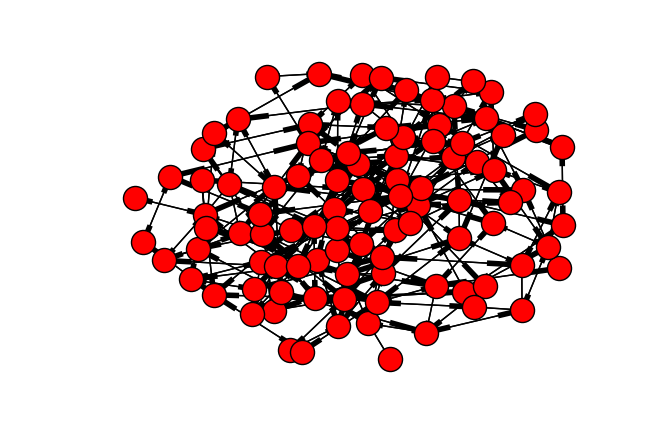

In [11]:
nx.draw(G)

In [12]:
#del G.node[21]['gender']

In [13]:
#G.edges()

In [14]:
#G = G.to_directed()

In [15]:
#nx.draw(G)

In [16]:
#G.edges()

In [17]:
for n in G.nodes():
    #del G.node[n]['gender']
    print(G.node.items())

dict_items([(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (10, {}), (11, {}), (12, {}), (13, {}), (14, {}), (15, {}), (16, {}), (17, {}), (18, {}), (19, {}), (20, {}), (21, {}), (22, {}), (23, {}), (24, {}), (25, {}), (26, {}), (27, {}), (28, {}), (29, {}), (30, {}), (31, {}), (32, {}), (33, {}), (34, {}), (35, {}), (36, {}), (37, {}), (38, {}), (39, {}), (40, {}), (41, {}), (42, {}), (43, {}), (44, {}), (45, {}), (46, {}), (47, {}), (48, {}), (49, {}), (50, {}), (51, {}), (52, {}), (53, {}), (54, {}), (55, {}), (56, {}), (57, {}), (58, {}), (59, {}), (60, {}), (61, {}), (62, {}), (63, {}), (64, {}), (65, {}), (66, {}), (67, {}), (68, {}), (69, {}), (70, {}), (71, {}), (72, {}), (73, {}), (74, {}), (75, {}), (76, {}), (77, {}), (78, {}), (79, {}), (80, {}), (81, {}), (82, {}), (83, {}), (84, {}), (85, {}), (86, {}), (87, {}), (88, {}), (89, {}), (90, {}), (91, {}), (92, {}), (93, {}), (94, {}), (95, {}), (96, {}), (97, {}), (98, {}), (99, {})

In [18]:
#G.nodes(data=True)

In [19]:
import decimal
import random
random.seed(9001)
for n in G.nodes():
    temp = round(random.uniform(0, 1), 3)
    G.add_node(n,ViRt=temp)

In [20]:
#G.nodes(data=True)

In [21]:
#for n in G.nodes():
#    del G.node[n]['gender']

In [22]:
#G.nodes(data=True)

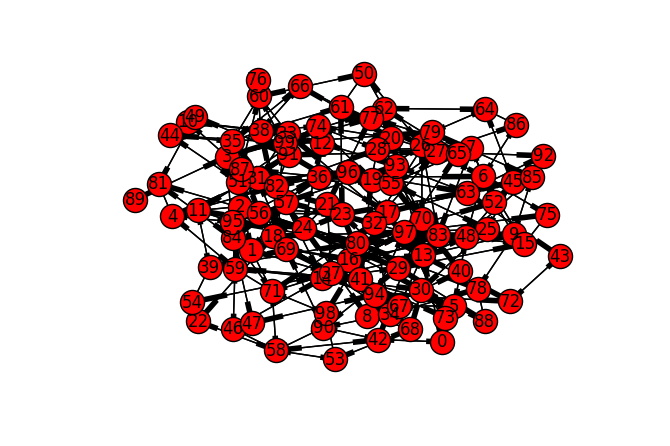

In [23]:
nx.draw(G, with_labels=True)

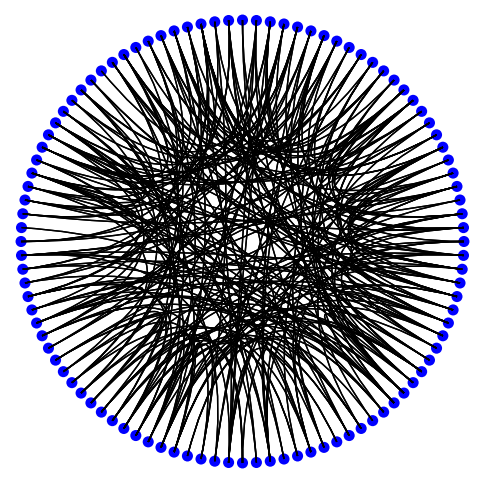

In [24]:
from circos import CircosPlot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

nodes = sorted(G.nodes())
edges = G.edges()
#node_cmap = {'Male':'blue', 'Female':'red'}
#nodecolors = [node_cmap[G.node[n]['sex']] for n in G.nodes()]

c = CircosPlot(nodes, edges, radius=10, ax=ax, fig=fig)
c.draw()  
plt.savefig('images/paper.jpg', dpi=300)

In [25]:
for n in G.nodes():
    frnds = len(G.neighbors(n))
    G.add_node(n,friends=frnds)

In [26]:
#G.nodes(data=True)

In [27]:
from random import randint
random.seed(9002)
for n in G.nodes():
    temp = randint(0,100)
    G.add_node(n,uploads=temp)

In [28]:
G.nodes(data=True)

[(0, {'ViRt': 0.037, 'friends': 2, 'uploads': 35}),
 (1, {'ViRt': 0.253, 'friends': 5, 'uploads': 82}),
 (2, {'ViRt': 0.564, 'friends': 6, 'uploads': 44}),
 (3, {'ViRt': 0.569, 'friends': 6, 'uploads': 80}),
 (4, {'ViRt': 0.606, 'friends': 5, 'uploads': 18}),
 (5, {'ViRt': 0.513, 'friends': 4, 'uploads': 48}),
 (6, {'ViRt': 0.713, 'friends': 7, 'uploads': 43}),
 (7, {'ViRt': 0.893, 'friends': 5, 'uploads': 93}),
 (8, {'ViRt': 0.616, 'friends': 3, 'uploads': 74}),
 (9, {'ViRt': 0.538, 'friends': 5, 'uploads': 72}),
 (10, {'ViRt': 0.759, 'friends': 4, 'uploads': 31}),
 (11, {'ViRt': 0.981, 'friends': 5, 'uploads': 8}),
 (12, {'ViRt': 0.291, 'friends': 3, 'uploads': 61}),
 (13, {'ViRt': 0.589, 'friends': 9, 'uploads': 4}),
 (14, {'ViRt': 0.074, 'friends': 8, 'uploads': 91}),
 (15, {'ViRt': 0.444, 'friends': 4, 'uploads': 4}),
 (16, {'ViRt': 0.769, 'friends': 4, 'uploads': 6}),
 (17, {'ViRt': 0.609, 'friends': 4, 'uploads': 93}),
 (18, {'ViRt': 0.739, 'friends': 8, 'uploads': 60}),
 (19, {

In [29]:
G.node[21]['friends']

6

In [30]:
G.node[21]['ViRt']

0.247

In [31]:
maxi_friends = 0
maxi_uploads = 0
for n in G.nodes():
    maxi_friends = max(maxi_friends, G.node[n]['friends'])
    maxi_uploads = max(maxi_uploads, G.node[n]['uploads'])

print(maxi_friends)
print(maxi_uploads)

12
99


In [32]:
import math
log_maxi_friends = math.log10(maxi_friends)
#log_maxi_friends = "%.3f" % log_maxi_friends
print(log_maxi_friends)
log_maxi_uploads = math.log10(maxi_uploads)
#log_maxi_uploads = "%.3f" % log_maxi_uploads
print(log_maxi_uploads)

1.0791812460476249
1.99563519459755


In [33]:
AttrCoeff = 0.0
for n in G.nodes():
    log_uploads = math.log10(1 + G.node[n]['uploads'])
    log_friends = math.log10(1 + G.node[n]['friends'])
    bias = math.log10(2)
    AttrCoeff = ((log_uploads + log_friends)/(log_maxi_uploads + log_maxi_friends + bias))
    AttrCoeff = round(AttrCoeff, 3)
    G.add_node(n,Attractiveness_Coeff=AttrCoeff)

In [34]:
G.nodes(data=True)

[(0,
  {'Attractiveness_Coeff': 0.602, 'ViRt': 0.037, 'friends': 2, 'uploads': 35}),
 (1,
  {'Attractiveness_Coeff': 0.799, 'ViRt': 0.253, 'friends': 5, 'uploads': 82}),
 (2,
  {'Attractiveness_Coeff': 0.74, 'ViRt': 0.564, 'friends': 6, 'uploads': 44}),
 (3,
  {'Attractiveness_Coeff': 0.816, 'ViRt': 0.569, 'friends': 6, 'uploads': 80}),
 (4,
  {'Attractiveness_Coeff': 0.609, 'ViRt': 0.606, 'friends': 5, 'uploads': 18}),
 (5,
  {'Attractiveness_Coeff': 0.708, 'ViRt': 0.513, 'friends': 4, 'uploads': 48}),
 (6,
  {'Attractiveness_Coeff': 0.754, 'ViRt': 0.713, 'friends': 7, 'uploads': 43}),
 (7,
  {'Attractiveness_Coeff': 0.815, 'ViRt': 0.893, 'friends': 5, 'uploads': 93}),
 (8,
  {'Attractiveness_Coeff': 0.734, 'ViRt': 0.616, 'friends': 3, 'uploads': 74}),
 (9,
  {'Attractiveness_Coeff': 0.782, 'ViRt': 0.538, 'friends': 5, 'uploads': 72}),
 (10,
  {'Attractiveness_Coeff': 0.653, 'ViRt': 0.759, 'friends': 4, 'uploads': 31}),
 (11,
  {'Attractiveness_Coeff': 0.513, 'ViRt': 0.981, 'friends':

In [35]:
G.edges(data=True)

[(0, 42, {}),
 (0, 13, {}),
 (1, 23, {}),
 (1, 57, {}),
 (1, 51, {}),
 (1, 37, {}),
 (1, 71, {}),
 (2, 80, {}),
 (2, 51, {}),
 (2, 87, {}),
 (2, 23, {}),
 (2, 11, {}),
 (2, 31, {}),
 (3, 99, {}),
 (3, 35, {}),
 (3, 84, {}),
 (3, 89, {}),
 (3, 57, {}),
 (3, 62, {}),
 (4, 31, {}),
 (4, 81, {}),
 (4, 82, {}),
 (4, 59, {}),
 (4, 95, {}),
 (5, 48, {}),
 (5, 73, {}),
 (5, 67, {}),
 (5, 37, {}),
 (6, 48, {}),
 (6, 36, {}),
 (6, 86, {}),
 (6, 7, {}),
 (6, 26, {}),
 (6, 75, {}),
 (6, 15, {}),
 (7, 28, {}),
 (7, 83, {}),
 (7, 52, {}),
 (7, 77, {}),
 (7, 6, {}),
 (8, 24, {}),
 (8, 40, {}),
 (8, 68, {}),
 (9, 97, {}),
 (9, 52, {}),
 (9, 13, {}),
 (9, 78, {}),
 (9, 85, {}),
 (10, 33, {}),
 (10, 44, {}),
 (10, 38, {}),
 (10, 87, {}),
 (11, 24, {}),
 (11, 39, {}),
 (11, 2, {}),
 (11, 91, {}),
 (11, 95, {}),
 (12, 24, {}),
 (12, 93, {}),
 (12, 38, {}),
 (13, 0, {}),
 (13, 16, {}),
 (13, 67, {}),
 (13, 20, {}),
 (13, 21, {}),
 (13, 97, {}),
 (13, 72, {}),
 (13, 9, {}),
 (13, 14, {}),
 (14, 97, {}),
 (1

In [36]:
#for v1,v2,a in G.edges(data=True):
#    G[v1][v2]['count'] = 1

In [37]:
#G.edges(data=True)

In [38]:
import pandas as pd
import numpy as np
df = pd.read_excel("Video_Prop.xlsx")
df.head()

,video ID,uploader,age,category,length,views,video rating(on a scale of 5),number of ratings,number of comments,Pi
0,jfACnjzXc3o,DaMagicGenie,1236,Comedy,284,565,2.92,13,13,0.012813
1,uWAxLCkpPW4,SpeedUpVideos,1257,Comedy,182,2084,4.67,49,31,0.047259
2,zzAFEtwIoAw,djsvideodiarys,1248,Comedy,266,936,2.13,39,13,0.021226
3,3iguSOqYAVg,techhomo,1257,Comedy,180,447,5.00,1,13,0.010137
4,sA2kG2p9INU,Zombiesaurus666,1257,Comedy,364,80,1.00,1,3,0.001814


In [39]:
df.columns[[0, 2]]

Index(['video ID', 'age'], dtype='object')

In [40]:
df.drop(df.columns[[1,2,3,4,8,9]], axis=1, inplace=True)

In [41]:
df.head()

,video ID,views,video rating(on a scale of 5),number of ratings
0,jfACnjzXc3o,565,2.92,13
1,uWAxLCkpPW4,2084,4.67,49
2,zzAFEtwIoAw,936,2.13,39
3,3iguSOqYAVg,447,5.00,1
4,sA2kG2p9INU,80,1.00,1


In [42]:
df.rename(columns={'video ID': 'id', 'views': 'nviews', 'video rating(on a scale of 5)': 'rating', 'number of ratings': 'nrating'}, inplace=True)

In [43]:
df.head()

,id,nviews,rating,nrating
0,jfACnjzXc3o,565,2.92,13
1,uWAxLCkpPW4,2084,4.67,49
2,zzAFEtwIoAw,936,2.13,39
3,3iguSOqYAVg,447,5.00,1
4,sA2kG2p9INU,80,1.00,1


In [44]:
for a,b in df.iterrows():
    print(a,b)

0 id         jfACnjzXc3o
nviews             565
rating            2.92
nrating             13
Name: 0, dtype: object
1 id         uWAxLCkpPW4
nviews            2084
rating            4.67
nrating             49
Name: 1, dtype: object
2 id         zzAFEtwIoAw
nviews             936
rating            2.13
nrating             39
Name: 2, dtype: object
3 id         3iguSOqYAVg
nviews             447
rating               5
nrating              1
Name: 3, dtype: object
4 id         sA2kG2p9INU
nviews              80
rating               1
nrating              1
Name: 4, dtype: object
5 id         MZX0VXLq54w
nviews            2755
rating               4
nrating             27
Name: 5, dtype: object
6 id         PawWL2Hml4I
nviews             168
rating               5
nrating              4
Name: 6, dtype: object
7 id         7qM-_ez_5kY
nviews             158
rating               0
nrating              0
Name: 7, dtype: object
8 id         0Ci_GcBeJpU
nviews              74
rating          

In [45]:
df.loc[df.nrating == 0, 'rating'] = 4
df.tail()

,id,nviews,rating,nrating
45,saSNRofAFVE,8940,3.67,49
46,s8wt91rs550,79,4.00,0
47,5kC4F86fejc,1047,1.33,6
48,ywUYymEQALo,330,5.00,1
49,5uc9WMwzaiY,1731,4.92,13


In [46]:
for a,b in df.iterrows():
    print(b)

id         jfACnjzXc3o
nviews             565
rating            2.92
nrating             13
Name: 0, dtype: object
id         uWAxLCkpPW4
nviews            2084
rating            4.67
nrating             49
Name: 1, dtype: object
id         zzAFEtwIoAw
nviews             936
rating            2.13
nrating             39
Name: 2, dtype: object
id         3iguSOqYAVg
nviews             447
rating               5
nrating              1
Name: 3, dtype: object
id         sA2kG2p9INU
nviews              80
rating               1
nrating              1
Name: 4, dtype: object
id         MZX0VXLq54w
nviews            2755
rating               4
nrating             27
Name: 5, dtype: object
id         PawWL2Hml4I
nviews             168
rating               5
nrating              4
Name: 6, dtype: object
id         7qM-_ez_5kY
nviews             158
rating               4
nrating              0
Name: 7, dtype: object
id         0Ci_GcBeJpU
nviews              74
rating               5
nrating    

In [47]:
ShRi = 0.0
random.seed(9003)
for n in G.nodes():
    ShRi = round(random.uniform(0, 1), 3)
    G.add_node(n,Sharing_Rate=ShRi)

In [48]:
G.nodes(data=True)

[(0,
  {'Attractiveness_Coeff': 0.602,
   'Sharing_Rate': 0.569,
   'ViRt': 0.037,
   'friends': 2,
   'uploads': 35}),
 (1,
  {'Attractiveness_Coeff': 0.799,
   'Sharing_Rate': 0.922,
   'ViRt': 0.253,
   'friends': 5,
   'uploads': 82}),
 (2,
  {'Attractiveness_Coeff': 0.74,
   'Sharing_Rate': 0.031,
   'ViRt': 0.564,
   'friends': 6,
   'uploads': 44}),
 (3,
  {'Attractiveness_Coeff': 0.816,
   'Sharing_Rate': 0.524,
   'ViRt': 0.569,
   'friends': 6,
   'uploads': 80}),
 (4,
  {'Attractiveness_Coeff': 0.609,
   'Sharing_Rate': 0.577,
   'ViRt': 0.606,
   'friends': 5,
   'uploads': 18}),
 (5,
  {'Attractiveness_Coeff': 0.708,
   'Sharing_Rate': 0.57,
   'ViRt': 0.513,
   'friends': 4,
   'uploads': 48}),
 (6,
  {'Attractiveness_Coeff': 0.754,
   'Sharing_Rate': 0.943,
   'ViRt': 0.713,
   'friends': 7,
   'uploads': 43}),
 (7,
  {'Attractiveness_Coeff': 0.815,
   'Sharing_Rate': 0.554,
   'ViRt': 0.893,
   'friends': 5,
   'uploads': 93}),
 (8,
  {'Attractiveness_Coeff': 0.734,
   

In [49]:
df['eviews'] = df['nviews']

In [50]:
df.head(10)

,id,nviews,rating,nrating,eviews
0,jfACnjzXc3o,565,2.92,13,565
1,uWAxLCkpPW4,2084,4.67,49,2084
2,zzAFEtwIoAw,936,2.13,39,936
3,3iguSOqYAVg,447,5.00,1,447
4,sA2kG2p9INU,80,1.00,1,80
5,MZX0VXLq54w,2755,4.00,27,2755
6,PawWL2Hml4I,168,5.00,4,168
7,7qM-_ez_5kY,158,4.00,0,158
8,0Ci_GcBeJpU,74,5.00,2,74
9,Wpgeu_dy8zw,1914,2.33,6,1914


In [51]:
sorted([(n,G.neighbors(n)) for n in G.nodes()], key=lambda x: len(x[1]), reverse=True)

[(97, [32, 33, 37, 65, 73, 75, 13, 14, 18, 9, 25, 94]),
 (13, [0, 16, 67, 20, 21, 97, 72, 9, 14]),
 (37, [1, 18, 83, 5, 54, 97, 71, 34, 21]),
 (38, [82, 35, 69, 12, 74, 10, 76, 66, 61]),
 (80, [48, 2, 83, 52, 39, 24, 41, 78, 95]),
 (14, [97, 82, 30, 46, 59, 13, 94, 29]),
 (18, [97, 99, 21, 22, 56, 37, 69, 51]),
 (24, [80, 35, 21, 8, 11, 12, 30, 95]),
 (29, [48, 56, 83, 23, 88, 90, 14, 15]),
 (35, [24, 66, 3, 38, 56, 44, 60, 31]),
 (6, [48, 36, 86, 7, 26, 75, 15]),
 (23, [1, 2, 56, 61, 29, 94, 63]),
 (31, [33, 2, 35, 4, 69, 55, 91]),
 (48, [16, 80, 5, 6, 29, 45, 85]),
 (51, [96, 1, 2, 21, 74, 44, 18]),
 (55, [65, 87, 40, 25, 27, 62, 31]),
 (56, [81, 18, 35, 23, 57, 29, 95]),
 (69, [16, 18, 67, 38, 39, 90, 31]),
 (71, [32, 1, 98, 84, 37, 58, 59]),
 (82, [96, 4, 38, 87, 91, 28, 14]),
 (83, [80, 68, 37, 7, 26, 29, 15]),
 (84, [16, 81, 3, 36, 71, 57, 47]),
 (91, [17, 82, 11, 49, 27, 60, 31]),
 (2, [80, 51, 87, 23, 11, 31]),
 (3, [99, 35, 84, 89, 57, 62]),
 (21, [18, 51, 37, 24, 13, 77]),
 (

In [52]:
df.ix[8]

id         0Ci_GcBeJpU
nviews              74
rating               5
nrating              2
eviews              74
Name: 8, dtype: object

In [53]:
random.seed(9004)
ShR_thr = 1.5
VwR_thr = 1
nodeSt = 0
rate = randint(1,5)
pardaught = dict()
exclu = list()
connected = list()
queue = [nodeSt]
visited_nodes = set()
path = set()
connected.append(nodeSt)
for node in queue:
    if node == nodeSt:
        df.ix[8,'nviews'] += 1
        df.ix[8,'eviews'] += 1
        rate = randint(1,5)
        #df.ix[8,'rating'] += 1
        r = df.ix[8,'rating']
        df.ix[8,'rating'] = ((df.ix[8,'nrating'] * r) + rate)/float(df.ix[8,'nrating'] + 1)
        df.ix[8,'nrating'] += 1
        #print(G.node[node])
        neighbors = G.neighbors(node)
        #exclu = [n for n in neighbors if n not in visited_nodes]
        exclu = [n for n in neighbors if n not in connected]
        pardaught[node] = exclu
        connected.extend(exclu)
        #queue.remove(node)
        visited_nodes.add(node)
        path.add(node)
        queue.extend(exclu)
        df.ix[8,'eviews'] += len(neighbors)
        print(str(node) + " viewed & shared")
    else:
        for key, values in pardaught.items():
            if node in values:
                parent = key
        if VwR_thr <= (df.ix[8,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
            df.ix[8,'nviews'] += 1
            df.ix[8,'eviews'] += 1
            print(str(node) + " viewed")
            rate = randint(1,5)
            r = df.ix[8,'rating']
            df.ix[8,'rating'] = ((df.ix[8,'nrating'] * r) + rate)/float(df.ix[8,'nrating'] + 1)
            df.ix[8,'nrating'] += 1
        if ShR_thr <= (df.ix[8,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
            #print(G.node[node])
            neighbors = G.neighbors(node)
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[8,'eviews'] += len(neighbors)
            print(str(node) + " shared")
#print(connected)

0 viewed & shared
13 viewed
13 shared
16 viewed
67 viewed
20 viewed
97 shared
9 viewed
32 viewed
33 viewed
37 shared
73 viewed
73 shared
75 viewed
18 viewed
25 viewed
94 viewed
1 shared
54 viewed
71 shared
34 shared
57 viewed
51 shared
98 viewed
98 shared
59 viewed
78 viewed
2 viewed
74 shared
44 viewed
17 viewed
36 viewed
38 viewed
38 shared
28 shared
82 shared
35 viewed
69 viewed
10 viewed
76 viewed
66 shared
61 shared
70 viewed
70 shared
7 viewed
4 viewed
87 shared
91 viewed
91 shared
26 viewed
26 shared
50 viewed
93 viewed
55 viewed
11 viewed
11 shared
27 viewed
31 viewed
6 viewed
6 shared
39 viewed
48 shared
86 viewed
15 viewed
80 viewed
80 shared
29 viewed
52 viewed


In [54]:
df.ix[8]

id         0Ci_GcBeJpU
nviews             119
rating         3.23404
nrating             47
eviews             268
Name: 8, dtype: object

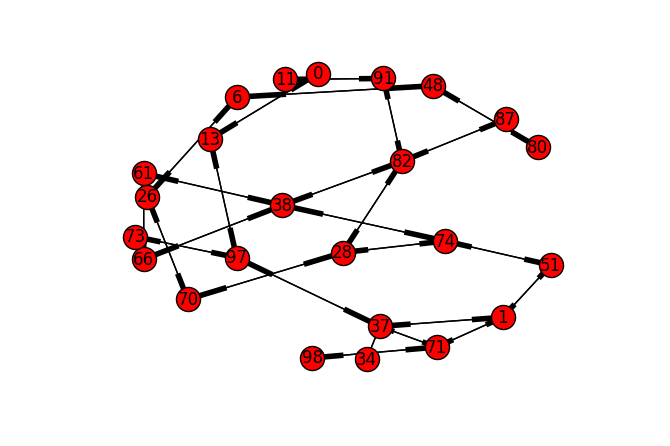

In [55]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [56]:
pardaught

{0: [42, 13],
 1: [23, 57, 51],
 6: [48, 86, 15],
 11: [24, 39, 95],
 13: [16, 67, 20, 21, 97, 72, 9, 14],
 26: [6],
 28: [70, 7],
 34: [90, 78],
 37: [1, 83, 5, 54, 71, 34],
 38: [82, 35, 69, 12, 10, 76, 66, 61],
 48: [80, 29, 45, 85],
 51: [96, 2, 74, 44],
 61: [26, 50],
 66: [],
 70: [93],
 71: [98, 84, 58, 59],
 73: [41, 30],
 74: [19, 36, 38, 28],
 80: [52],
 82: [4, 87, 91],
 87: [55, 60],
 91: [11, 49, 27, 31],
 97: [32, 33, 37, 65, 73, 75, 18, 25, 94],
 98: [17, 53]}

In [57]:
lst = list()
for key, values in pardaught.items():
    lst.extend(values)
print(lst)

[42, 13, 23, 57, 51, 93, 98, 84, 58, 59, 41, 30, 19, 36, 38, 28, 24, 39, 95, 17, 53, 16, 67, 20, 21, 97, 72, 9, 14, 52, 4, 87, 91, 55, 60, 6, 11, 49, 27, 31, 70, 7, 32, 33, 37, 65, 73, 75, 18, 25, 94, 90, 78, 1, 83, 5, 54, 71, 34, 82, 35, 69, 12, 10, 76, 66, 61, 80, 29, 45, 85, 96, 2, 74, 44, 48, 86, 15, 26, 50]


In [58]:
print(len(lst))
myset=set(lst)
print(len(myset))

80
80


In [59]:
#H = G.to_undirected()

In [60]:
#H.edges()

In [61]:
nx.shortest_path(G, 4, 14)

[4, 82, 14]

In [62]:
def path_exists(node1, node2, G):
    visited_nodes = set()
    queue = [node1]
    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            queue.remove(node)
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        if len(queue) == 0:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            return False

In [63]:
def test_path_exists():
    print(path_exists(18, 5, G))
    print(path_exists(29, 26, G))
    
test_path_exists()

Path exists between nodes 18 and 5
True
Path exists between nodes 29 and 26
True


In [64]:
nx.has_path(G, 29, 26)

True

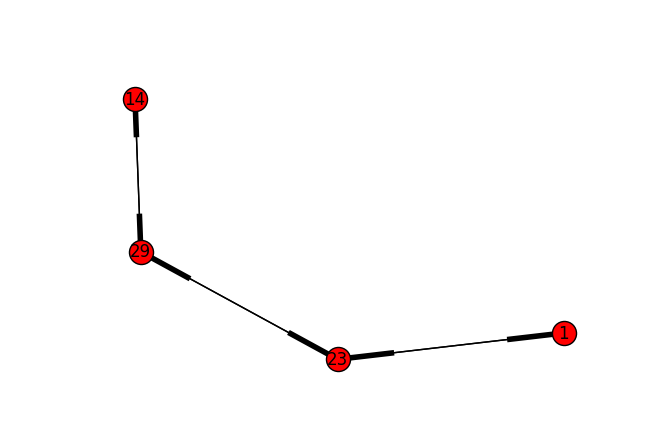

In [65]:
def extract_path_edges(G, source, target):
    if nx.has_path(G, source, target):
        shor = nx.shortest_path(G, source, target)
        newG = G.subgraph(shor)
        return newG

    else:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))
        
newG = extract_path_edges(G, 1, 14)
nx.draw(newG, with_labels=True)

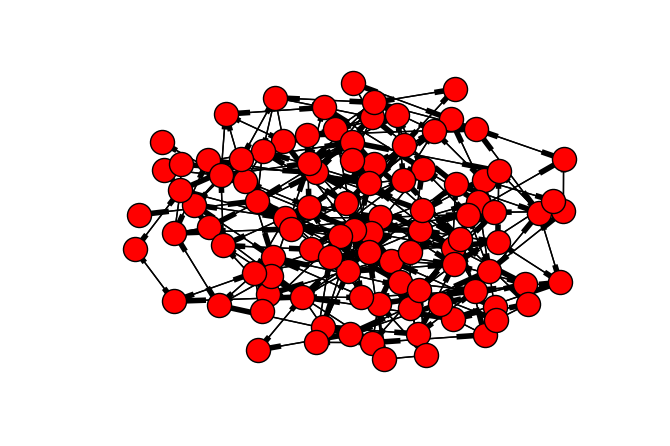

In [66]:
#df[min(df['nviews'])]
nx.draw(G)

In [67]:
df['nviews'].argmin()

38

In [68]:
df.ix[38]

id         SQ_HHV8vdAE
nviews               7
rating               4
nrating              0
eviews               7
Name: 38, dtype: object

In [69]:
#df[['nviews']]

# Let's propagate

### Request from node 97 for video 38

In [70]:
#df.ix[38,'nviews'] += 1
#df.ix[38,'eviews'] += 1
df.ix[38]

id         SQ_HHV8vdAE
nviews               7
rating               4
nrating              0
eviews               7
Name: 38, dtype: object

In [71]:
G.node[97]['Sharing_Rate']

0.859

In [72]:
random.seed(9004)
nodeSt = 97
rate = randint(1,5)
pardaught = dict()
exclu = list()
connected = list()
queue = [nodeSt]
visited_nodes = set()
path = set()
connected.append(nodeSt)
for node in queue:
    if node == nodeSt:
        df.ix[38,'nviews'] += 1
        df.ix[38,'eviews'] += 1
        rate = randint(1,5)
        r = df.ix[38,'rating']
        df.ix[38,'rating'] = ((df.ix[38,'nrating'] * r) + rate)/float(df.ix[38,'nrating'] + 1)
        df.ix[38,'nrating'] += 1
        #print(G.node[node])
        neighbors = G.neighbors(node)
        #exclu = [n for n in neighbors if n not in visited_nodes]
        exclu = [n for n in neighbors if n not in connected]
        pardaught[node] = exclu
        #connected |= set(exclu)
        connected.extend(exclu)
        #queue.remove(node)
        visited_nodes.add(node)
        path.add(node)
        queue.extend(exclu)
        df.ix[38,'eviews'] += len(neighbors)
        print(str(node) + " viewed & shared")
    else:
        for key, values in pardaught.items():
            if node in values:
                parent = key
        if VwR_thr <= (df.ix[38,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
            df.ix[38,'nviews'] += 1
            df.ix[38,'eviews'] += 1
            print(str(node) + " viewed")
            rate = randint(1,5)
            r = df.ix[38,'rating']
            df.ix[38,'rating'] = ((df.ix[38,'nrating'] * r) + rate)/float(df.ix[38,'nrating'] + 1)
            df.ix[38,'nrating'] += 1
        if ShR_thr <= (df.ix[38,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
            #print(G.node[node])
            neighbors = G.neighbors(node)
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[38,'eviews'] += len(neighbors)
            print(str(node) + " shared")

97 viewed & shared
32 viewed
32 shared
33 viewed
37 shared
73 viewed
73 shared
75 viewed
13 viewed
13 shared
18 viewed
9 viewed
25 viewed
94 viewed
57 viewed
54 viewed
67 viewed


In [73]:
df.ix[38]

id         SQ_HHV8vdAE
nviews              20
rating         2.30769
nrating             13
eviews              60
Name: 38, dtype: object

In [74]:
lst = list()
for key, values in pardaught.items():
    lst.extend(values)
print(len(lst))
myset=set(lst)
print(len(myset))

29
29


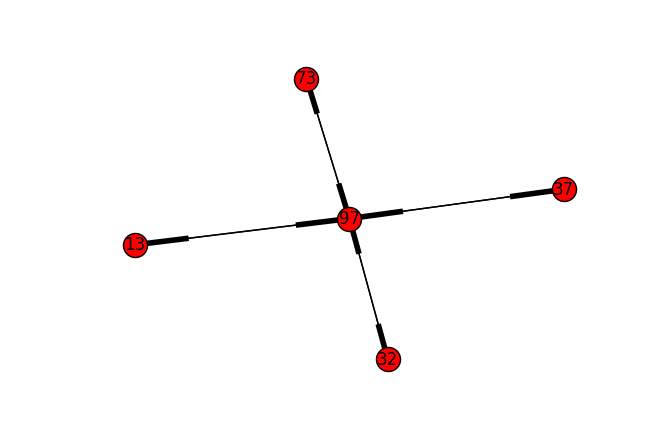

In [75]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [76]:
len(path)

5

### 100 requests with random recommendations

In [77]:
random.seed(5002)
for i in range(100):
    nodeSt = randint(0,99)
    rate = 0
    pardaught = dict()
    exclu = list()
    connected = list()
    queue = [nodeSt]
    visited_nodes = set()
    vid = randint(0,49)
    #print(vid)
    path = set()
    connected.append(nodeSt)
    for node in queue:
        if node == nodeSt:
            df.ix[vid,'nviews'] += 1
            df.ix[vid,'eviews'] += 1
            rate = randint(1,5)
            r = df.ix[vid,'rating']
            df.ix[vid,'rating'] = ((df.ix[vid,'nrating'] * r) + rate)/float(df.ix[vid,'nrating'] + 1)
            df.ix[vid,'nrating'] += 1
            #print(G.node[node])
            neighbors = G.neighbors(node)
            #exclu = [n for n in neighbors if n not in visited_nodes]
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[vid,'eviews'] += len(neighbors)
            print(str(node) + " viewed & shared")
        else:
            for key, values in pardaught.items():
                if node in values:
                    parent = key
            if VwR_thr <= (df.ix[vid,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
                df.ix[vid,'nviews'] += 1
                df.ix[vid,'eviews'] += 1
                print(str(node) + " viewed")
                rate = randint(1,5)
                r = df.ix[vid,'rating']
                df.ix[vid,'rating'] = ((df.ix[vid,'nrating'] * r) + rate)/float(df.ix[vid,'nrating'] + 1)
                df.ix[vid,'nrating'] += 1
            if ShR_thr <= (df.ix[vid,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
                #print(G.node[node])
                neighbors = G.neighbors(node)
                exclu = [n for n in neighbors if n not in connected]
                pardaught[node] = exclu
                connected.extend(exclu)
                #queue.remove(node)
                visited_nodes.add(node)
                path.add(node)
                queue.extend(exclu)
                df.ix[vid,'eviews'] += len(neighbors)
                print(str(node) + " shared")

81 viewed & shared
56 viewed
49 shared
4 viewed
4 shared
84 viewed
91 viewed
91 shared
31 viewed
82 shared
59 viewed
17 viewed
11 viewed
11 shared
27 viewed
60 viewed
96 shared
38 viewed
38 shared
87 shared
28 shared
14 shared
39 viewed
2 viewed
51 shared
35 viewed
69 viewed
74 viewed
74 shared
10 viewed
76 viewed
66 viewed
66 shared
61 shared
55 viewed
19 viewed
70 viewed
70 shared
7 viewed
7 shared
97 shared
30 shared
46 viewed
46 shared
13 viewed
13 shared
94 viewed
29 viewed
1 shared
44 viewed
18 viewed
18 shared
36 viewed
20 viewed
26 viewed
26 shared
50 viewed
50 shared
93 viewed
83 viewed
52 viewed
52 shared
6 viewed
6 shared
32 viewed
32 shared
33 viewed
37 shared
65 viewed
65 shared
73 viewed
73 shared
75 viewed
9 viewed
9 shared
25 viewed
68 viewed
68 shared
88 viewed
88 shared
16 viewed
67 viewed
57 viewed
57 shared
71 shared
99 viewed
99 shared
22 viewed
62 shared
80 viewed
80 shared
48 shared
86 viewed
15 viewed
34 shared
79 shared
5 viewed
5 shared
54 viewed
78 viewed
8 v

In [78]:
df.head(10)

,id,nviews,rating,nrating,eviews
0,jfACnjzXc3o,600,2.561667,48,721
1,uWAxLCkpPW4,2319,3.284613,284,3198
2,zzAFEtwIoAw,956,2.526610,59,1031
3,3iguSOqYAVg,549,3.019417,103,911
4,sA2kG2p9INU,82,2.333333,3,88
5,MZX0VXLq54w,2873,3.310345,145,3307
6,PawWL2Hml4I,273,3.266055,109,708
7,7qM-_ez_5kY,160,2.000000,2,164
8,0Ci_GcBeJpU,230,3.082278,158,740
9,Wpgeu_dy8zw,1919,2.361818,11,1931


In [79]:
df.tail()

,id,nviews,rating,nrating,eviews
45,saSNRofAFVE,8999,3.507685,108,9220
46,s8wt91rs550,136,2.964912,57,328
47,5kC4F86fejc,1048,1.425714,7,1052
48,ywUYymEQALo,386,2.929825,57,574
49,5uc9WMwzaiY,1889,3.034854,171,2465


In [80]:
pdf = rdf = df

In [81]:
pdf.head()

,id,nviews,rating,nrating,eviews
0,jfACnjzXc3o,600,2.561667,48,721
1,uWAxLCkpPW4,2319,3.284613,284,3198
2,zzAFEtwIoAw,956,2.526610,59,1031
3,3iguSOqYAVg,549,3.019417,103,911
4,sA2kG2p9INU,82,2.333333,3,88


In [82]:
pdf['Expectation'] = pdf['eviews'] - pdf['nviews']

In [83]:
pdf.head(10)

,id,nviews,rating,nrating,eviews,Expectation
0,jfACnjzXc3o,600,2.561667,48,721,121
1,uWAxLCkpPW4,2319,3.284613,284,3198,879
2,zzAFEtwIoAw,956,2.526610,59,1031,75
3,3iguSOqYAVg,549,3.019417,103,911,362
4,sA2kG2p9INU,82,2.333333,3,88,6
5,MZX0VXLq54w,2873,3.310345,145,3307,434
6,PawWL2Hml4I,273,3.266055,109,708,435
7,7qM-_ez_5kY,160,2.000000,2,164,4
8,0Ci_GcBeJpU,230,3.082278,158,740,510
9,Wpgeu_dy8zw,1919,2.361818,11,1931,12


In [84]:
expSum = pdf['Expectation'].sum()
print(expSum)

11244


In [85]:
pdf['Probability'] = pdf['Expectation']/float(expSum)
pdf.head(10)

,id,nviews,rating,nrating,eviews,Expectation,Probability
0,jfACnjzXc3o,600,2.561667,48,721,121,0.010761
1,uWAxLCkpPW4,2319,3.284613,284,3198,879,0.078175
2,zzAFEtwIoAw,956,2.526610,59,1031,75,0.006670
3,3iguSOqYAVg,549,3.019417,103,911,362,0.032195
4,sA2kG2p9INU,82,2.333333,3,88,6,0.000534
5,MZX0VXLq54w,2873,3.310345,145,3307,434,0.038598
6,PawWL2Hml4I,273,3.266055,109,708,435,0.038687
7,7qM-_ez_5kY,160,2.000000,2,164,4,0.000356
8,0Ci_GcBeJpU,230,3.082278,158,740,510,0.045358
9,Wpgeu_dy8zw,1919,2.361818,11,1931,12,0.001067
